<a href="https://colab.research.google.com/github/raegar/ImageProcessing/blob/main/Image_compression_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Compression Techniques: Lossy vs Lossless
In this tutorial, we will explore the differences between lossy and lossless compression techniques, specifically focusing on **Discrete Cosine Transform (DCT)** for lossy compression.

Compression is essential when dealing with large data such as images, videos, and audio files. Compression reduces file size while retaining most of the essential information. There are two main types of compression:
- **Lossy Compression**: Some data is lost in the process, but the result is still acceptable for many applications. DCT is commonly used in JPEG image compression.
- **Lossless Compression**: No data is lost, meaning the original file can be perfectly reconstructed from the compressed version.




## 1. Discrete Cosine Transform (DCT) - Lossy Compression
DCT is used to transform spatial data into frequency data. By doing this, we can discard some of the less important frequencies (usually the higher ones) to achieve compression. JPEG uses DCT to compress images.

Let's walk through an example of how DCT is applied to compress an image.


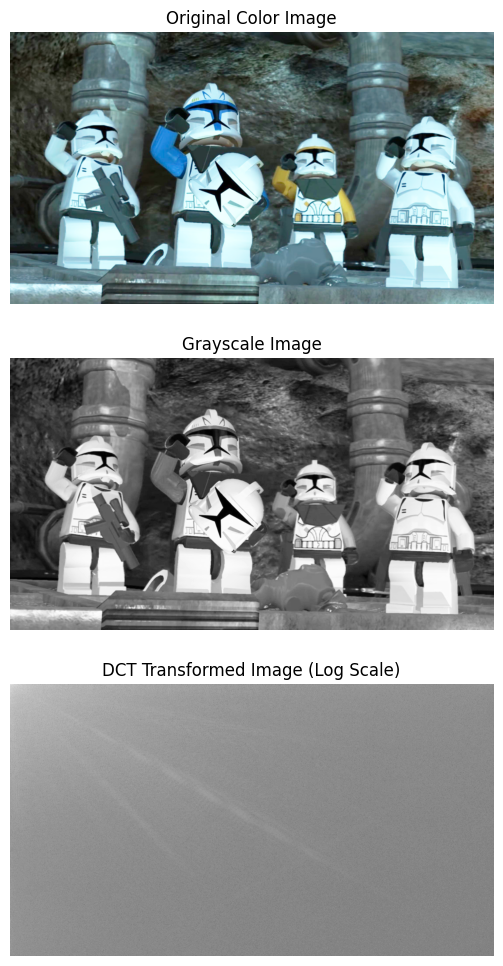

In [18]:

# Required imports
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an example image (original color)
color_img = Image.open('example.png')

# Convert to grayscale for DCT
grayscale_img = color_img.convert('L')
img_np = np.array(grayscale_img)

# Apply 2D Discrete Cosine Transform (DCT)
dct = cv2.dct(np.float32(img_np))

# Show the original color image, grayscale image, and DCT transformed image
plt.figure(figsize=(8, 12))  # Adjust the size for better visibility

# Display the original color image
plt.subplot(3, 1, 1)
plt.title("Original Color Image")
plt.imshow(color_img)  # Display color image without grayscale colormap
plt.axis('off')  # Hide axis for cleaner visualization

# Display the grayscale image
plt.subplot(3, 1, 2)
plt.title("Grayscale Image")
plt.imshow(grayscale_img, cmap='gray')  # Display in grayscale
plt.axis('off')

# Display the DCT transformed image (in log scale for better visualization)
plt.subplot(3, 1, 3)
plt.title("DCT Transformed Image (Log Scale)")
plt.imshow(np.log(np.abs(dct) + 1e-8), cmap='gray')  # Log scale
plt.axis('off')

# Show all images
plt.show()



In the DCT transformed image, the top-left corner contains the most important frequencies (lower frequencies). The values further away from the top-left corner represent higher frequencies, which can be discarded without significantly affecting image quality.

### Applying Inverse DCT to reconstruct the image:
Now, let's apply the inverse DCT and see how the image can be reconstructed after discarding some of the higher frequencies.


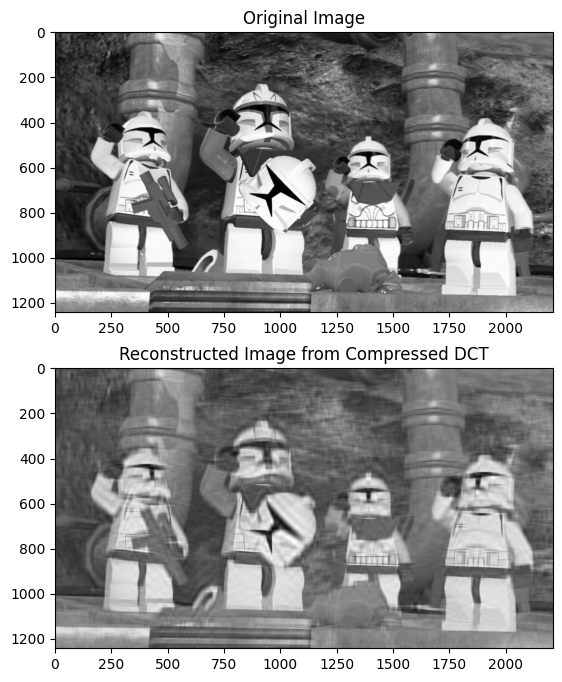

In [23]:

# Zero out higher frequency components for compression
dct_compressed = np.copy(dct)
block_size = 50 #Change this value to modify the amount of compression (how much of the DCT matrix is retained)
dct_compressed[block_size:, block_size:] = 0  # Keep only the low-frequency components

# Avoid taking log of zero by adding a small constant to zero values
dct_compressed_log = np.log(np.abs(dct_compressed) + 1e-8)  # Add a small constant before log

# Apply inverse DCT to reconstruct the image
img_reconstructed = cv2.idct(dct_compressed)

# Show the original, DCT transformed, compressed DCT, and reconstructed images
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.title("Original Image")
plt.imshow(img_np, cmap='gray')

plt.subplot(2, 1, 2)
plt.title("Reconstructed Image from Compressed DCT")
plt.imshow(img_reconstructed, cmap='gray')

plt.show()
